In [2]:
# plots

# importing libraries 

from __future__ import division
from __future__ import print_function  
import warnings
import pandas as pd
import gsp_support as gsp
import matplotlib.pyplot as plt
import numpy as np
pd.options.plotting.backend = "plotly"
import datetime

# importing libraries for the plot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import dataframe_image as dfi
import math

In [7]:
# read data and preprocess it
input_folder = 'FINAL/Disaggregation/stage2_filter/'
# daily = pd.read_csv(input_folder+'RP AC daily_logs 27Apr21.csv')
# total = pd.read_csv(input_folder+'3 min disaggregated result FINAL with removed meters.csv')
total = pd.read_csv(input_folder+'3min_disaggregated_final.csv')



total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')

In [10]:
total['month'] = total.index.to_period('M')

In [14]:
total['month'] = total['month'].astype(str)

In [15]:
total

,gsp,power,current,compressor,final_compressor,ac_power,ac_on,voltage,meter,month
x_Timestamp,,,,,,,,,,
2019-05-09 00:00:00,0.0,3440.0,14.74,0,1,1328.598375,1,233.66,MH24,2019-05
2019-05-09 00:03:00,0.0,2440.0,10.20,0,1,2051.372306,1,238.77,MH24,2019-05
2019-05-09 00:06:00,0.0,2420.0,10.17,0,1,2031.372306,1,239.08,MH24,2019-05
2019-05-09 00:09:00,0.0,2420.0,10.20,0,1,2031.372306,1,238.73,MH24,2019-05
2019-05-09 00:12:00,0.0,2380.0,10.00,0,1,1991.372306,1,237.68,MH24,2019-05
...,...,...,...,...,...,...,...,...,...,...
2020-12-28 23:45:00,0.0,160.0,1.36,0,0,0.000000,0,263.63,MH21,2020-12
2020-12-28 23:48:00,0.0,140.0,1.35,0,0,0.000000,0,264.07,MH21,2020-12
2020-12-28 23:51:00,0.0,140.0,1.37,0,0,0.000000,0,263.90,MH21,2020-12


In [3]:
output_folder = 'FINAL/final_/data_av'

In [23]:
# keep mar-oct

tot19 = total.loc[total['month'].str.contains('2019')]
tot20 = total.loc[total['month'].str.contains('2020')]

In [4]:
len(total['meter'].unique())

NameError: name 'total' is not defined

In [22]:
total = total.loc[~total['meter'].isin(['BR35','BR36','BR49','BR13'])]

In [25]:
hh_list = list(total['meter'].unique())

In [6]:
total = pd.read_csv(output_folder+'/3 min disaggregated result FINAL with removed meters Mar-Oct.csv')

FileNotFoundError: [Errno 2] File FINAL/final_/data_av/3 min disaggregated result FINAL with removed meters Mar-Oct.csv does not exist: 'FINAL/final_/data_av/3 min disaggregated result FINAL with removed meters Mar-Oct.csv'

In [ ]:
'3 min disaggregated result FINAL with removed meters Mar-Oct.csv')

In [10]:
# 27 Metetrs

27

In [26]:
def func(sub): 
    c = len(np.unique(sub.index.date))
    return c

In [27]:
ind = list(total['month'].unique())
hh_list = sorted(hh_list)

In [28]:

year = [2019,2020]

# need to make a list of dicts

for y in year:
    d = {k:[] for k in hh_list}

    df = total.loc[total.index.year==y]
    y_str = str(y)
    l = [i for i in ind if y_str in i]
    for hh in hh_list:
        dff = df.loc[df['meter']==hh]
        for month in l:
            s = dff.loc[dff['month']==month]
            c = len(np.unique(s.index.date))
            d[hh].append(c)
#             print(d)
    if y==2019:
        df19 = pd.DataFrame(d,index=l)
    else:
        df20 = pd.DataFrame(d,index=l)
        
    
    
    



In [46]:
fig19 = df19.style.background_gradient(cmap ='Reds').set_properties(**{'font-size': '20px'})
# dfi.export(fig20, output_folder+'feature_map_2020_tobesure.png')


,BR06,BR07,BR08,BR11,BR12,BR18,BR22,BR23,BR24,BR31,...,MH18,MH21,MH22,MH23,MH24,MH27,MH33,MH36,MH43,MH45
2019-05,0,0,0,0,0,0,0,0,0,0,...,31,31,25,23,23,21,20,15,2,2
2019-06,0,0,0,0,0,0,0,0,0,0,...,30,30,30,30,30,30,29,28,30,29
2019-07,9,9,10,11,15,15,0,15,14,13,...,20,21,20,19,21,29,29,28,18,18
2019-08,30,30,30,23,28,28,0,28,26,30,...,24,29,20,24,8,28,28,23,24,21
2019-09,29,26,28,30,29,29,9,30,30,29,...,30,30,30,21,30,29,30,28,29,29
2019-10,29,28,29,29,29,27,29,28,29,29,...,23,29,19,29,25,29,20,26,29,23


In [30]:
df_full = pd.concat([df19,df20],axis=0)

In [31]:
df_full

,BR06,BR07,BR08,BR11,BR12,BR18,BR22,BR23,BR24,BR31,...,MH18,MH21,MH22,MH23,MH24,MH27,MH33,MH36,MH43,MH45
2019-05,0,0,0,0,0,0,0,0,0,0,...,31,31,25,23,23,21,20,15,2,2
2019-06,0,0,0,0,0,0,0,0,0,0,...,30,30,30,30,30,30,29,28,30,29
2019-07,9,9,10,11,15,15,0,15,14,13,...,20,21,20,19,21,29,29,28,18,18
2019-08,30,30,30,23,28,28,0,28,26,30,...,24,29,20,24,8,28,28,23,24,21
2019-09,29,26,28,30,29,29,9,30,30,29,...,30,30,30,21,30,29,30,28,29,29
2019-10,29,28,29,29,29,27,29,28,29,29,...,23,29,19,29,25,29,20,26,29,23
2019-11,29,30,30,28,29,29,29,29,30,28,...,25,30,29,30,30,28,29,23,29,29
2019-12,29,29,30,18,19,19,19,18,19,29,...,27,30,23,29,26,24,24,4,30,17
2020-01,29,29,27,27,21,30,31,27,0,30,...,26,30,21,0,10,31,20,11,31,27
2020-02,29,23,28,29,27,27,29,29,27,18,...,26,24,23,22,13,24,15,6,29,12


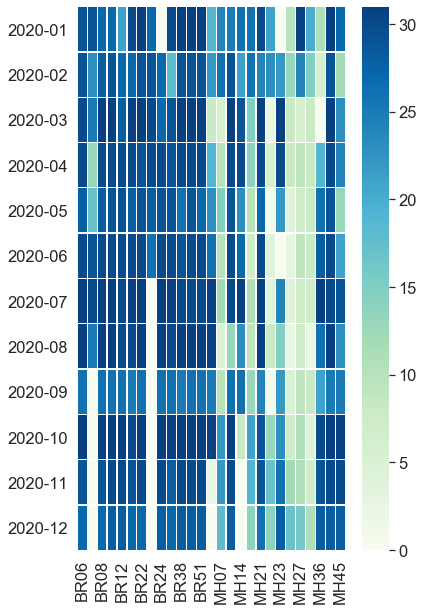

In [62]:
# plotting heatmap style df with sns

import pandas as pd
import seaborn as sns 
  
# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (6, 10))

sns.heatmap(df20, cmap ='GnBu', linewidths = 0.30, annot = False,annot_kws={'size': 10})
plt.yticks(rotation=0) 

plt.show()

In [66]:
output_folder = 'FINAL/final1/data_av/'

In [67]:
fig.savefig(output_folder+'monthwise num_days available data 2020_try.pdf', dpi=600)

In [ ]:
def func1(df):
    h = 0
    print('ok')
    h = h+1
    print(h)
   
    dff = df.loc[df['ac_on']==1] 
    k = len(np.unique(df.index.date))
    c = len(np.unique(dff.index.date))
    
    j = c/k
 
    return j


In [84]:
# available data on 15 minute interval

# outputs - towo 2 dfs with percentage in each cell depicting the number if days for which data is available from total number of days for which data was supposed to be available


year = [2019,2020]

# need to make a list of dicts

for y in year:
    d = {k:[] for k in hh_list}

    df = total.loc[total.index.year==y]
    df['time'] = df.index



    i = 0
    ind = []
    for hh in hh_list:
    #     print(hh)
        sub = df.loc[df['meter']==hh]
        i = i+1
    #     print(i)
        sub['quarter'] = sub['time'].dt.round('15min')
        sub['quarter'] = sub['quarter'].dt.time
        groupedd = sub.groupby('quarter')
        for n,g in groupedd:
            subb = groupedd.get_group(n)
            k = len(np.unique(subb.index.date))
            
            init_ = subb.iloc[0].name.date()
            
            if y==2019:
                final_ = datetime.datetime.strptime('2019-11-01', '%Y-%m-%d')
            else:
                final_ = datetime.datetime.strptime('2020-11-01', '%Y-%m-%d')
                
            final_ = final_.date()
            delta = final_-init_
            
            t = delta.days
            
            j = k/t
            d[hh].append(j*100)
            if hh=='MH27':
                ind.append(n)
                
    # make the df
    if y==2019:
        df19 = pd.DataFrame(d,index=ind)
    else:
        df20 = pd.DataFrame(d,index=ind)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

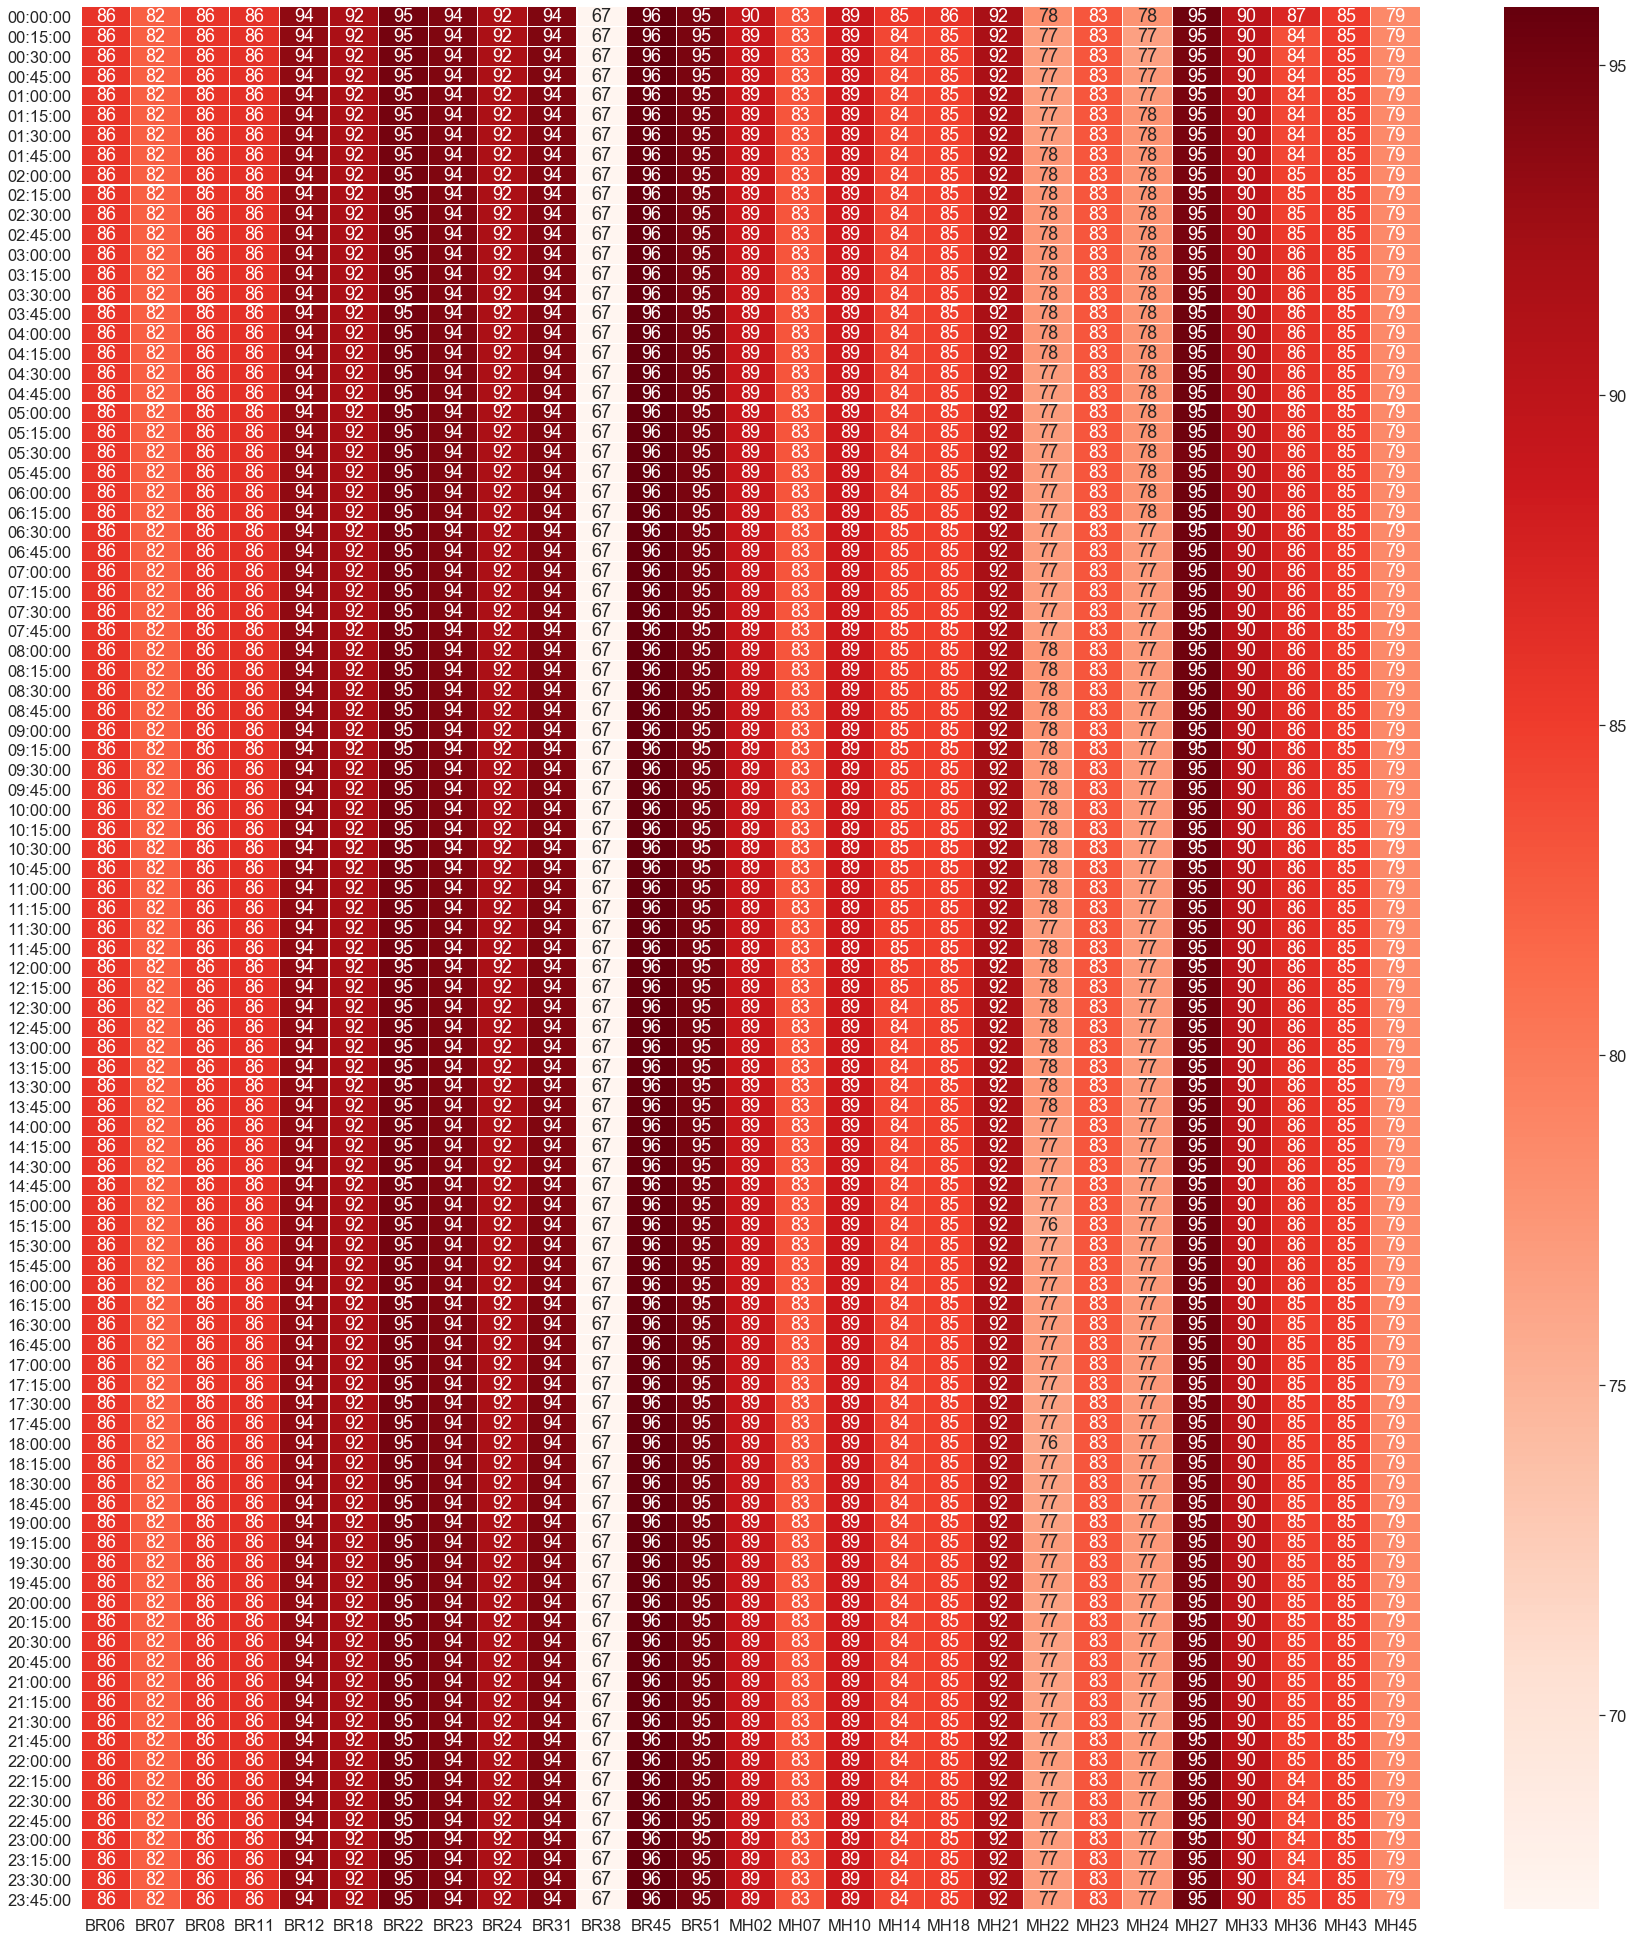

In [99]:
# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (30, 35))

sns.heatmap(df19, cmap ='Reds', linewidths = 0.2, annot = True)
plt.yticks(rotation=0) 

plt.show()

In [101]:
fig.savefig(output_folder+'quarterwise av data 2019.png')